# Bayesian survival analysis with LFP

We fit a Stan model for survival analysis (event time = stop time) using trial type and LFP power as covariates. This notebook examines the results.

In [1]:
import numpy as np
import pandas as pd
import pystan
import pickle
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
dtup = 18, 1

In [3]:
fname = '.'.join([str(x) for x in dtup]) 

In [4]:
dat = pd.read_csv('data/' + fname + '.lfpsurvdata.csv', index_col=0)
dat.shape

(4683, 164)

### Take an average across trials

In [5]:
dat['rel_time'] = np.around(dat['rel_time'], decimals=3)
aa = dat.set_index('rel_time').iloc[:, 2:]
aa.head()

,trial,delta.17,delta.18,delta.19,delta.20,delta.21,delta.22,delta.23,delta.24,delta.25,...,gamma.39,gamma.40,gamma.41,gamma.42,gamma.43,gamma.44,gamma.45,gamma.46,gamma.47,gamma.48
rel_time,,,,,,,,,,,,,,,,,,,,,
0.1,23,-0.832538,-1.222455,-0.006793,0.649562,0.100828,-0.458660,-0.671929,-0.330281,-0.371330,...,-0.361903,0.183214,-0.279616,-0.734038,-0.543665,0.585201,-0.713279,0.708811,-0.022715,-0.240924
0.2,23,-1.771386,-2.810369,-0.587902,0.785651,-0.889064,-0.389357,-0.576174,0.009071,-0.275417,...,-1.101298,0.489496,-0.568355,-0.911765,-0.888614,0.237620,-0.894543,0.618132,-0.125147,-0.454099
0.3,23,-0.901912,-2.124467,-0.675744,0.699035,-0.536968,0.122424,-0.183137,0.311576,-0.571610,...,-0.858929,0.081376,-0.288348,-0.988046,-0.583902,0.067816,-0.663710,0.867514,0.045237,-0.582122
0.4,23,0.189822,-0.598500,0.206560,0.682518,0.410689,0.440216,0.253444,0.482034,-0.575385,...,-1.210318,-0.172792,-0.095281,-1.065621,-0.501082,0.030926,-0.398856,1.086646,-0.078115,-0.453725
0.5,23,0.430810,-0.277288,0.425110,0.949829,0.723712,0.552886,0.352473,0.348457,-0.066632,...,-1.671601,0.207343,-0.154133,-1.060792,-0.445564,0.009080,-0.240006,1.241243,-0.304058,-0.336189


<IPython.core.display.Javascript object>


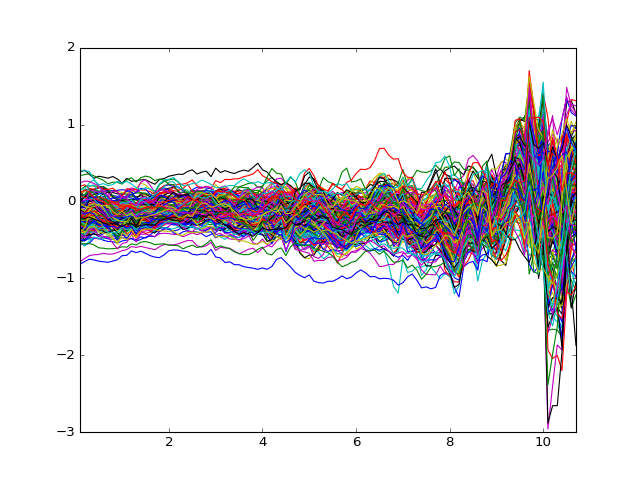

In [6]:
bb = dat.drop(['event', 'ttype', 'trial'], axis=1).set_index('rel_time')
mn = bb.groupby(by=lambda x: np.around(x, decimals=1)).mean()
ss = bb.groupby(by=lambda x: np.around(x, decimals=1)).std()
(mn).plot(legend=False)
# plt.ylim(-1, 1);

<IPython.core.display.Javascript object>


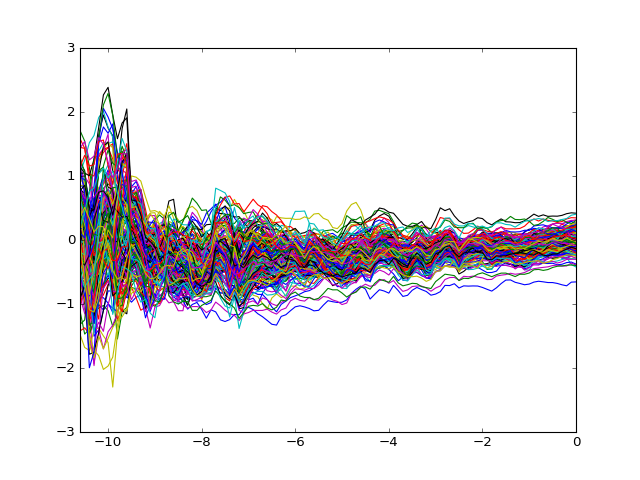

In [7]:
def negtime(df):
    df.index = df.index - df.index.max()
    return df

# get time relative to stop
bb = dat.set_index('rel_time').groupby('trial').apply(negtime)
bb.index = bb.index.droplevel(0)

# take mean across trials
bb = bb.drop(['event', 'ttype', 'trial'], axis=1)
mn = bb.groupby(by=lambda x: np.around(x, decimals=1)).mean()
ss = bb.groupby(by=lambda x: np.around(x, decimals=1)).std()
(mn).plot(legend=False)
# plt.ylim(-1, 1);

In [8]:
with open('data/' + fname + '.stan_model', 'rb') as f:
    sm = pickle.load(f)
with open('data/' + fname + '.stan_samples', 'rb') as f:
    fit = pickle.load(f)

In [9]:
def get_summ_df(fit, var):
    summ = fit.summary(var)
    return pd.DataFrame(summ['summary'], index=summ['summary_rownames'], columns=summ['summary_colnames'])

In [10]:
betas = get_summ_df(fit, 'beta')

In [11]:
betas

,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat
beta[0],-0.000618,0.000743,0.021021,-0.045832,-0.002569,-7.337920e-05,0.001802,0.036708,800.0,0.998792
beta[1],0.000647,0.000638,0.018051,-0.030611,-0.001681,1.225121e-05,0.002299,0.032470,800.0,0.998155
beta[2],-0.000991,0.000811,0.022362,-0.043435,-0.001687,3.350348e-05,0.002074,0.027849,761.0,0.997952
beta[3],0.001624,0.000839,0.023361,-0.020814,-0.001615,4.184939e-06,0.001785,0.038786,776.0,0.998558
beta[4],0.001685,0.000825,0.022777,-0.029220,-0.001607,8.357437e-06,0.002391,0.054511,762.0,1.001350
beta[5],0.000369,0.000839,0.023010,-0.032894,-0.001895,-2.062942e-05,0.002004,0.038230,753.0,1.001911
beta[6],-0.011691,0.001823,0.048132,-0.152515,-0.003463,-2.216691e-04,0.000830,0.015936,697.0,0.997843
beta[7],0.003706,0.001097,0.031035,-0.021370,-0.001615,7.102193e-06,0.001961,0.056138,800.0,0.999070
beta[8],0.000625,0.000774,0.019730,-0.034181,-0.002342,3.376135e-06,0.001679,0.045012,649.0,1.001012
beta[9],-0.003104,0.002796,0.038443,-0.050371,-0.001867,1.628907e-05,0.001920,0.035852,189.0,1.014579


In [12]:
def plot_coeffs(df, sorted=False, transform=None):
    fig = plt.figure()
    if transform:
        b_m = transform(df['mean'])
        b_lo = b_m - transform(df['2.5%'])
        b_hi = transform(df['97.5%']) - b_m
    else:
        b_m = df['mean']
        b_lo = b_m - df['2.5%']
        b_hi = df['97.5%'] - b_m

    if len(b_m) > 1:
        if sorted:
            idx = np.argsort(b_m)
        else:
            idx = np.arange(len(b_m))

        b_m, b_lo, b_hi = b_m[idx], b_lo[idx], b_hi[idx]

        contains_1 = (df['2.5%'][idx] < 0) & (df['97.5%'][idx] > 0)
        
    else:
        contains_1 = (df['2.5%'] < 0) & (df['97.5%'] > 0)
    
    plt.errorbar(np.arange(len(b_m)), b_m, yerr=[b_lo, b_hi], capthick=0, 
                 marker='o', linestyle='None')

    # plot "significant" coefficients in red
    
    sigs = np.where(~contains_1)[0]
    plt.errorbar(sigs, b_m[sigs], yerr=[b_lo[sigs], b_hi[sigs]], capthick=0, 
                 marker='o', linestyle='None', color='red')

    plt.axhline(1., color='k', zorder=-1)
    plt.xlim(-1, len(b_m) + 1)
    
    return fig

<IPython.core.display.Javascript object>


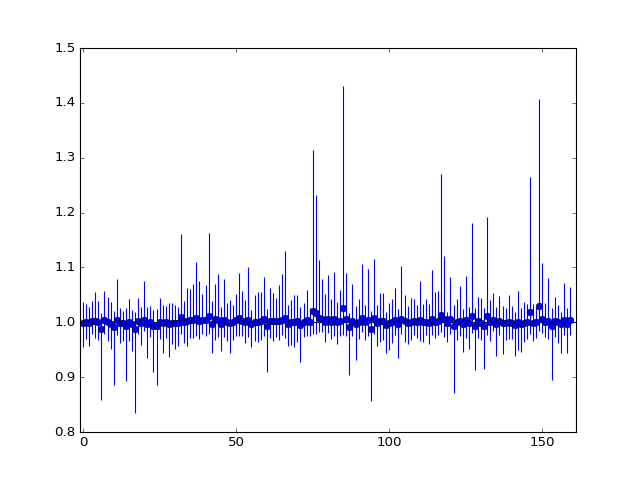

In [13]:
plot_coeffs(betas, sorted=False, transform=np.exp);

In [14]:
haz_means = get_summ_df(fit, 'mm')
haz_means.head()

,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat
mm[0],7.788496,0.052189,1.453805,5.253917,6.740026,7.743378,8.708228,10.855016,776.0,1.001602
mm[1],4.122448,0.026468,0.714649,2.975188,3.606890,4.035744,4.553404,5.723131,729.0,1.007848
mm[2],3.021454,0.017755,0.486894,2.257355,2.691243,2.946102,3.288226,4.187045,752.0,1.003848


<IPython.core.display.Javascript object>


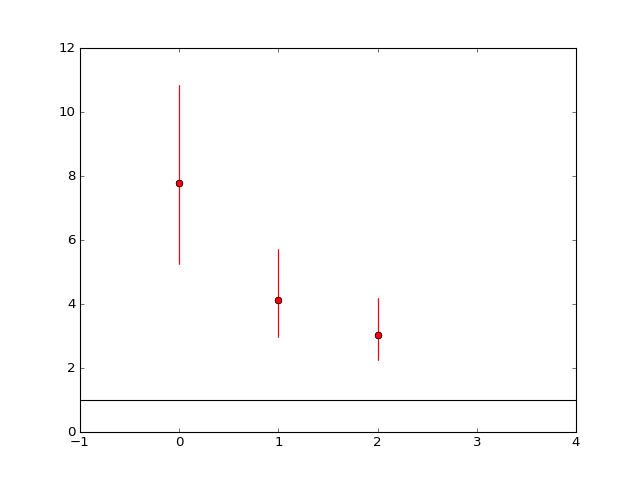

In [15]:
plot_coeffs(haz_means);